In [1]:
import pandas as pd
import numpy as np


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Online Retail.xlsx")

# Preview
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Convert InvoiceDate safely to datetime
df["InvoiceDate"] = pd.to_datetime(
    df["InvoiceDate"],
    format="%d/%m/%Y %H:%M",
    errors="coerce"
)

# Check result
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [4]:
# Remove rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

# Remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Create TotalRevenue column
df["TotalRevenue"] = df["Quantity"] * df["UnitPrice"]

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  float64       
 7   Country       397924 non-null  object        
 8   TotalRevenue  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [6]:
total_customers = df["CustomerID"].nunique()
total_orders = df["InvoiceNo"].nunique()
total_revenue = df["TotalRevenue"].sum()

total_customers, total_orders, round(total_revenue, 2)


(4339, 18536, np.float64(8911407.9))

In [7]:
# Create time-based features
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
df["InvoiceDay"] = df["InvoiceDate"].dt.date
df["InvoiceHour"] = df["InvoiceDate"].dt.hour

df[["InvoiceDate", "InvoiceMonth", "InvoiceDay", "InvoiceHour"]].head()


,InvoiceDate,InvoiceMonth,InvoiceDay,InvoiceHour
0,2010-12-01 08:26:00,2010-12,2010-12-01,8
1,2010-12-01 08:26:00,2010-12,2010-12-01,8
2,2010-12-01 08:26:00,2010-12,2010-12-01,8
3,2010-12-01 08:26:00,2010-12,2010-12-01,8
4,2010-12-01 08:26:00,2010-12,2010-12-01,8


In [8]:
monthly_revenue = (
    df.groupby("InvoiceMonth")["TotalRevenue"]
      .sum()
      .reset_index()
)

monthly_revenue.head()


,InvoiceMonth,TotalRevenue
0,2010-12,572713.890
1,2011-01,569445.040
2,2011-02,447137.350
3,2011-03,595500.760
4,2011-04,469200.361


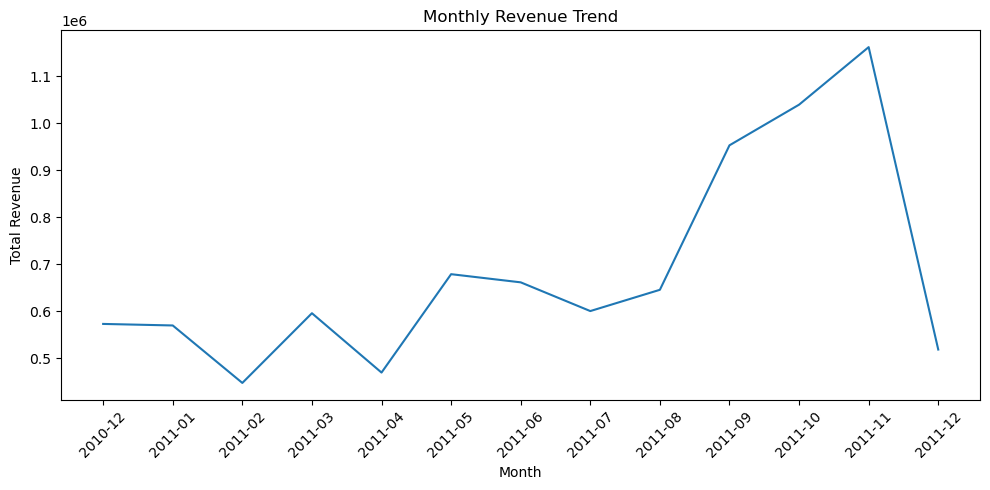

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["InvoiceMonth"].astype(str),
         monthly_revenue["TotalRevenue"])

plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


In [10]:
# Revenue by country
country_revenue = (
    df.groupby("Country")["TotalRevenue"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

country_revenue.head(10)


,Country,TotalRevenue
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


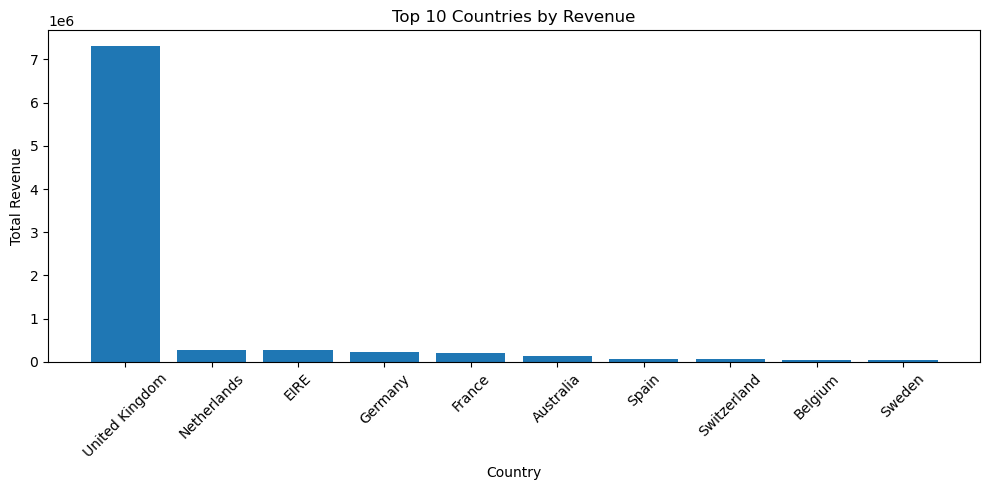

In [11]:
plt.figure(figsize=(10, 5))
plt.bar(country_revenue["Country"][:10],
        country_revenue["TotalRevenue"][:10])

plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


In [12]:
# Top customers by total revenue
customer_revenue = (
    df.groupby("CustomerID")["TotalRevenue"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

customer_revenue.head(10)


,CustomerID,TotalRevenue
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194550.79
3,16446.0,168472.50
4,14911.0,143825.06
5,12415.0,124914.53
6,14156.0,117379.63
7,17511.0,91062.38
8,16029.0,81024.84
9,12346.0,77183.60


In [13]:
# Number of orders per customer
customer_orders = (
    df.groupby("CustomerID")["InvoiceNo"]
      .nunique()
      .reset_index(name="OrderCount")
)

customer_orders.head()


,CustomerID,OrderCount
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [14]:
# Classify customers
customer_orders["CustomerType"] = customer_orders["OrderCount"].apply(
    lambda x: "Repeat Customer" if x > 1 else "One-Time Customer"
)

customer_orders["CustomerType"].value_counts()


CustomerType
Repeat Customer      2845
One-Time Customer    1494
Name: count, dtype: int64

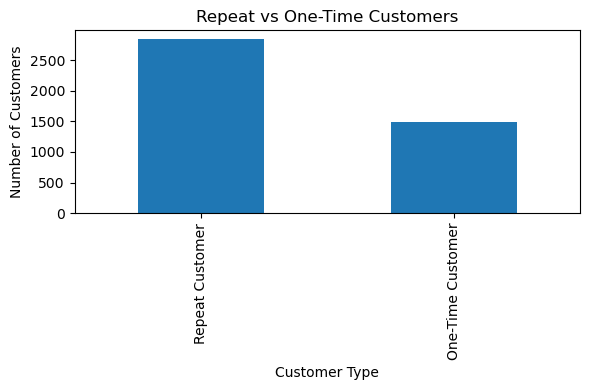

In [15]:
plt.figure(figsize=(6, 4))
customer_orders["CustomerType"].value_counts().plot(kind="bar")

plt.title("Repeat vs One-Time Customers")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


In [16]:
# Reference date (last transaction date in dataset)
reference_date = df["InvoiceDate"].max()

reference_date


Timestamp('2011-12-09 12:50:00')

In [17]:
# Build RFM table
rfm = (
    df.groupby("CustomerID")
      .agg({
          "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
          "InvoiceNo": "nunique",                                      # Frequency
          "TotalRevenue": "sum"                                        # Monetary
      })
      .reset_index()
)

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [18]:
# STEP 12.3 — Robust RFM Scoring (industry-safe approach)

# Recency score (lower recency = better)
rfm["R_Score"] = pd.qcut(
    rfm["Recency"].rank(method="first"),
    q=4,
    labels=[4, 3, 2, 1]
)

# Frequency score (higher = better)
rfm["F_Score"] = pd.qcut(
    rfm["Frequency"].rank(method="first"),
    q=4,
    labels=[1, 2, 3, 4]
)

# Monetary score (higher = better)
rfm["M_Score"] = pd.qcut(
    rfm["Monetary"].rank(method="first"),
    q=4,
    labels=[1, 2, 3, 4]
)

# Combine scores
rfm["RFM_Score"] = (
    rfm["R_Score"].astype(str)
    + rfm["F_Score"].astype(str)
    + rfm["M_Score"].astype(str)
)

rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,1,7,4310.00,4,4,4,444
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,3,1,4,314
4,12350.0,309,1,334.40,1,1,2,112


In [19]:
# Identify top customers
best_customers = rfm[rfm["RFM_Score"] >= "444"]

best_customers.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
1,12347.0,1,7,4310.00,4,4,4,444
15,12362.0,2,10,5226.23,4,4,4,444
34,12388.0,15,6,2780.66,4,4,4,444
56,12417.0,2,9,3649.10,4,4,4,444
61,12423.0,0,8,1859.31,4,4,4,444
